In [1]:
import pandas as pd                #Importamos pandas para el manejo de los dataframes
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np        #Importamos la librería numpy para manipular arreglos.
!pip install gdown  
import gdown as gd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
!pip install joblib

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#id = "1KxRxCpgK0rCL0043Hp-PlvdvUjt8PxRN"
#output = "diffParsed.csv"

#gd.download(id=id, output=output, quiet=False)

In [3]:
df = pd.read_csv("/work/diffParsed.csv")


In [4]:
df.shape

(2374, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    2374 non-null   int64 
 1   cve_id                        2374 non-null   object
 2   diff                          2374 non-null   object
 3   cwe_name                      2374 non-null   object
 4   diff_parsed                   2374 non-null   object
 5   cvss3_integrity_impact        2161 non-null   object
 6   cvss3_confidentiality_impact  2161 non-null   object
 7   cvss3_availability_impact     2161 non-null   object
 8   filename                      2374 non-null   object
 9   complexity                    1989 non-null   object
 10  severity                      2272 non-null   object
 11  code_before                   2374 non-null   object
 12  code_after                    2374 non-null   object
 13  cwe_id            

In [6]:
df['cve_id'] = df['cve_id'].astype("string")
df['diff']= df['diff'].astype("string")
df['cvss3_integrity_impact']= df['cvss3_integrity_impact'].astype("string")
df['cvss3_confidentiality_impact']= df['cvss3_confidentiality_impact'].astype("string")
df['cvss3_availability_impact']= df['cvss3_availability_impact'].astype("string")
df['filename']= df['filename'].astype("string")
df['complexity']= df['complexity'].astype("string")
df['cwe_name']= df['cwe_name'].astype("string")
df['diff_parsed']= df['diff_parsed'].astype("string")
df['severity']= df['severity'].astype("string")
df['code_before'] = df['code_before'].astype("string") 
df['code_after'] = df['code_after'].astype("string") 
df['cwe_id'] = df['cwe_id'].astype("string") 

In [7]:
df.dtypes


Unnamed: 0                       int64
cve_id                          string
diff                            string
cwe_name                        string
diff_parsed                     string
cvss3_integrity_impact          string
cvss3_confidentiality_impact    string
cvss3_availability_impact       string
filename                        string
complexity                      string
severity                        string
code_before                     string
code_after                      string
cwe_id                          string
dtype: object

In [8]:
print('¿El conjunto de datos tiene nan?',df.isnull().values.any(),'\n')

¿El conjunto de datos tiene nan? True 



In [9]:
df.dropna(inplace=True)

In [10]:
df = df.replace(to_replace='None', value=np.nan).dropna()

In [11]:
df['complexity']= df['complexity'].astype("float")

In [12]:
df.shape

(1584, 14)

In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 2363
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cve_id                        1584 non-null   string 
 1   diff                          1584 non-null   string 
 2   cwe_name                      1584 non-null   string 
 3   diff_parsed                   1584 non-null   string 
 4   cvss3_integrity_impact        1584 non-null   string 
 5   cvss3_confidentiality_impact  1584 non-null   string 
 6   cvss3_availability_impact     1584 non-null   string 
 7   filename                      1584 non-null   string 
 8   complexity                    1584 non-null   float64
 9   severity                      1584 non-null   string 
 10  code_before                   1584 non-null   string 
 11  code_after                    1584 non-null   string 
 12  cwe_id                        1584 non-null   string 
dtypes: 

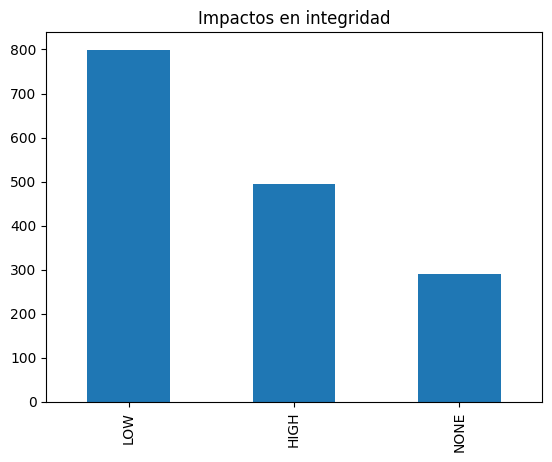

In [15]:
plot = df['cvss3_integrity_impact'].value_counts().plot(kind='bar',
                                            title='Impactos en integridad')

<AxesSubplot: >

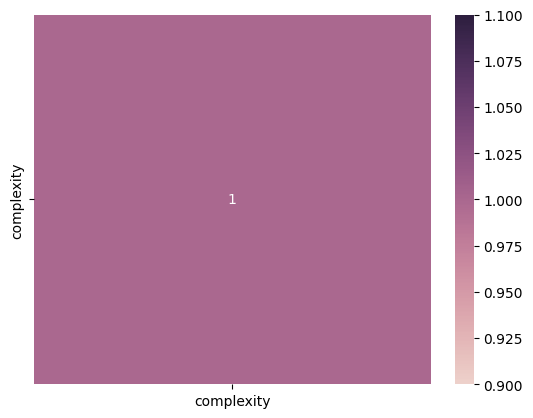

In [16]:
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))


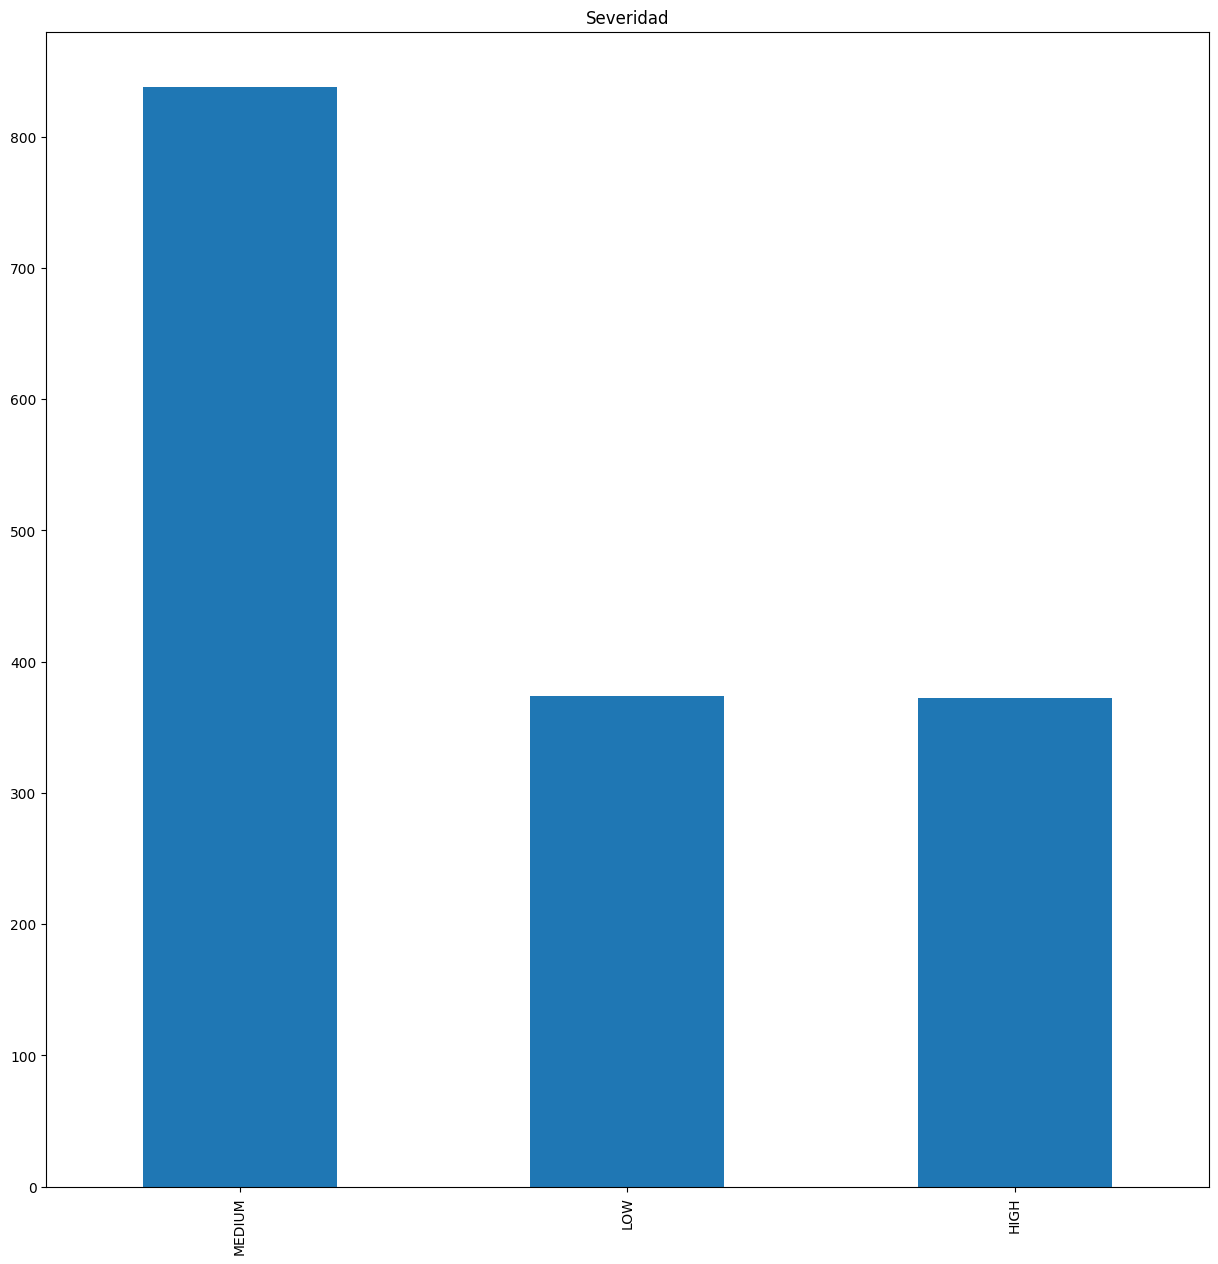

In [17]:
g = plt.figure()
g.set_figwidth(15)
g.set_figheight(15)
plt = df['severity'].value_counts().plot(kind='bar',
                                            title='Severidad')

In [18]:
#df1= pd.get_dummies(df['severity'])
#df= pd.concat([df,df1], axis=1).reindex(df.index)
#df.drop('severity', axis=1, inplace=True)
#df

In [19]:
%matplotlib inline

In [20]:
pd.set_option("display.max_rows", None)

In [21]:
df['cwe_name'].value_counts()

Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting')                  573
Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection')                  102
Insufficient Information                                                                               90
Cross-Site Request Forgery (CSRF)                                                                      64
Improper Neutralization of Special Elements used in an OS Command ('OS Command Injection')             57
Improperly Controlled Modification of Object Prototype Attributes ('Prototype Pollution')              52
Server-Side Request Forgery (SSRF)                                                                     50
Improper Input Validation                                                                              47
Improper Control of Generation of Code ('Code Injection')                                              46
Other                                         

### Disminuir cantidad de vulnerabilidades

In [22]:
counts = df['cwe_name'].value_counts()
df = df[~df['cwe_name'].isin(counts[counts < 90].index)]

In [23]:
df

,cve_id,diff,cwe_name,diff_parsed,cvss3_integrity_impact,cvss3_confidentiality_impact,cvss3_availability_impact,filename,complexity,severity,code_before,code_after,cwe_id
0,CVE-2016-7103,"@@ -206,7 +206,7 @@ test( ""closeOnEscape"", fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(209, '\texpect( 4 );'), (225, ''),...",LOW,LOW,NONE,options.js,41.0,MEDIUM,"define( [ ""jquery"", ""./helper"", ""ui/widgets...","define( [ ""jquery"", ""./helper"", ""ui/widgets...",CWE-79
1,CVE-2016-7103,"@@ -426,7 +426,7 @@ $.widget( ""ui.dialog"", { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(429, '\t\t\t\tlabel: $( ""<a>"" ).te...",LOW,LOW,NONE,dialog.js,159.0,MEDIUM,/*! * jQuery UI Dialog @VERSION * http://jqu...,/*! * jQuery UI Dialog @VERSION * http://jqu...,CWE-79
2,CVE-2021-41184,"@@ -113,7 +113,9 @@ QUnit.test( ""positions"", f...",Improper Neutralization of Input During Web Pa...,"{'added': [(116, '\tassert.expect( 10 + ( scro...",LOW,LOW,NONE,core.js,43.0,MEDIUM,"define( [ ""qunit"", ""jquery"", ""lib/common"", ...","define( [ ""qunit"", ""jquery"", ""lib/common"", ...",CWE-79
3,CVE-2021-41184,"@@ -148,7 +148,12 @@ $.fn.position = function(...",Improper Neutralization of Input During Web Pa...,"{'added': [(151, ''), (152, '\t\t// Make sure ...",LOW,LOW,NONE,position.js,102.0,MEDIUM,/*! * jQuery UI Position @VERSION * http://j...,/*! * jQuery UI Position @VERSION * http://j...,CWE-79
27,CVE-2016-2043,"@@ -102,7 +102,7 @@ function goToFinish1NF() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(105, ' ""<h3>"" + PMA_sprintf...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
32,CVE-2016-2560,"@@ -1840,7 +1840,7 @@ AJAX.registerOnload('fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(1843, ' var new_content = ""...",LOW,LOW,NONE,functions.js,809.0,MEDIUM,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
33,CVE-2016-2561,"@@ -243,6 +243,24 @@ function escapeHtml(unsaf...",Improper Neutralization of Input During Web Pa...,"{'added': [(246, 'function escapeJsString(unsa...",LOW,LOW,NONE,functions.js,811.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
34,CVE-2016-2561,"@@ -638,7 +638,7 @@ AJAX.registerOnload('norma...",Improper Neutralization of Input During Web Pa...,"{'added': [(641, ' \'<input typ...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
35,CVE-2016-2561,"@@ -128,7 +128,7 @@ function goToStep4() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(131, ' $(""#extra in...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
36,CVE-2016-2561,"@@ -82,7 +82,7 @@ function goTo2NFStep1() { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(85, ' $(\'.tblFoote...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79


In [24]:
df = df.drop(df[df['cwe_name'] == "Other"].index)

In [25]:
df.shape

(765, 13)

In [26]:
df['cwe_name'].value_counts()

Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting')    573
Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection')    102
Insufficient Information                                                                 90
Name: cwe_name, dtype: Int64

<AxesSubplot: xlabel='cwe_name', ylabel='count'>

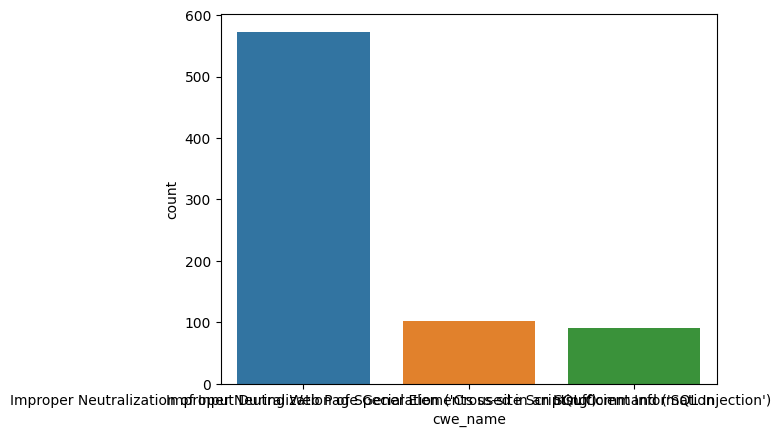

In [27]:
sns.countplot(x=df['cwe_name'])

# Diff between code_after and code_before

In [28]:
df['diff_parsed']

0       {'added': [(209, '\texpect( 4 );'), (225, ''),...
1       {'added': [(429, '\t\t\t\tlabel: $( "<a>" ).te...
2       {'added': [(116, '\tassert.expect( 10 + ( scro...
3       {'added': [(151, ''), (152, '\t\t// Make sure ...
27      {'added': [(105, '        "<h3>" + PMA_sprintf...
32      {'added': [(1843, '        var new_content = "...
33      {'added': [(246, 'function escapeJsString(unsa...
34      {'added': [(641, '                \'<input typ...
35      {'added': [(131, '                $("#extra in...
36      {'added': [(85, '                $(\'.tblFoote...
37      {'added': [(112, "        retval.attr('alt', e...
38      {'added': [(790, "            '<div>' + escape...
39      {'added': [(204, "                        PMA_...
40      {'added': [(3537, '            fields = PMA_sp...
41      {'added': [(159, '        columnNames.push(esc...
48      {'added': [(52, '\t// Strict HTML recognition ...
49      {'added': [(30, '\t\texpected = 22,'), (1203, ...
50      {'adde

In [29]:
df

,cve_id,diff,cwe_name,diff_parsed,cvss3_integrity_impact,cvss3_confidentiality_impact,cvss3_availability_impact,filename,complexity,severity,code_before,code_after,cwe_id
0,CVE-2016-7103,"@@ -206,7 +206,7 @@ test( ""closeOnEscape"", fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(209, '\texpect( 4 );'), (225, ''),...",LOW,LOW,NONE,options.js,41.0,MEDIUM,"define( [ ""jquery"", ""./helper"", ""ui/widgets...","define( [ ""jquery"", ""./helper"", ""ui/widgets...",CWE-79
1,CVE-2016-7103,"@@ -426,7 +426,7 @@ $.widget( ""ui.dialog"", { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(429, '\t\t\t\tlabel: $( ""<a>"" ).te...",LOW,LOW,NONE,dialog.js,159.0,MEDIUM,/*! * jQuery UI Dialog @VERSION * http://jqu...,/*! * jQuery UI Dialog @VERSION * http://jqu...,CWE-79
2,CVE-2021-41184,"@@ -113,7 +113,9 @@ QUnit.test( ""positions"", f...",Improper Neutralization of Input During Web Pa...,"{'added': [(116, '\tassert.expect( 10 + ( scro...",LOW,LOW,NONE,core.js,43.0,MEDIUM,"define( [ ""qunit"", ""jquery"", ""lib/common"", ...","define( [ ""qunit"", ""jquery"", ""lib/common"", ...",CWE-79
3,CVE-2021-41184,"@@ -148,7 +148,12 @@ $.fn.position = function(...",Improper Neutralization of Input During Web Pa...,"{'added': [(151, ''), (152, '\t\t// Make sure ...",LOW,LOW,NONE,position.js,102.0,MEDIUM,/*! * jQuery UI Position @VERSION * http://j...,/*! * jQuery UI Position @VERSION * http://j...,CWE-79
27,CVE-2016-2043,"@@ -102,7 +102,7 @@ function goToFinish1NF() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(105, ' ""<h3>"" + PMA_sprintf...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
32,CVE-2016-2560,"@@ -1840,7 +1840,7 @@ AJAX.registerOnload('fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(1843, ' var new_content = ""...",LOW,LOW,NONE,functions.js,809.0,MEDIUM,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
33,CVE-2016-2561,"@@ -243,6 +243,24 @@ function escapeHtml(unsaf...",Improper Neutralization of Input During Web Pa...,"{'added': [(246, 'function escapeJsString(unsa...",LOW,LOW,NONE,functions.js,811.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
34,CVE-2016-2561,"@@ -638,7 +638,7 @@ AJAX.registerOnload('norma...",Improper Neutralization of Input During Web Pa...,"{'added': [(641, ' \'<input typ...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
35,CVE-2016-2561,"@@ -128,7 +128,7 @@ function goToStep4() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(131, ' $(""#extra in...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
36,CVE-2016-2561,"@@ -82,7 +82,7 @@ function goTo2NFStep1() { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(85, ' $(\'.tblFoote...",LOW,LOW,NONE,normalization.js,92.0,LOW,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79


In [30]:
X_diff= df.iloc[:, 3].values
processeds=[]

In [31]:
for info in range(0,len(X_diff)):
    processed= re.sub(r'\W', ' ', str(X_diff[info]))
    processed= re.sub(r'(?:^| )\w(?:$| )','',processed)
    processed = re.sub("\d+", "", processed)
    processed= re.sub(r'\s+', ' ', processed, flags=re.I)
    processeds.append(processed)

In [32]:
processeds[1]

' added ttlabel text this options closeText html ttlabel text this options closeText html deleted ttlabel this options closeText ttlabel value '

In [33]:
len(processeds)

765

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 2359
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cve_id                        765 non-null    string 
 1   diff                          765 non-null    string 
 2   cwe_name                      765 non-null    string 
 3   diff_parsed                   765 non-null    string 
 4   cvss3_integrity_impact        765 non-null    string 
 5   cvss3_confidentiality_impact  765 non-null    string 
 6   cvss3_availability_impact     765 non-null    string 
 7   filename                      765 non-null    string 
 8   complexity                    765 non-null    float64
 9   severity                      765 non-null    string 
 10  code_before                   765 non-null    string 
 11  code_after                    765 non-null    string 
 12  cwe_id                        765 non-null    string 
dtypes: f

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processeds).toarray()

In [38]:
X.shape

(765, 2000)

In [39]:
#x = df_with_color.apply(lambda col: LabelEncoder().fit_transform(col))
#titanic.embark_town = le.fit_transform(titanic.embark_town)
df.severity = LabelEncoder().fit_transform(df.severity)
x=df

x = x.drop(columns='severity', axis=1)
features = x.columns

# output variables
y = df['severity']

x[:10]

,cve_id,diff,cwe_name,diff_parsed,cvss3_integrity_impact,cvss3_confidentiality_impact,cvss3_availability_impact,filename,complexity,code_before,code_after,cwe_id
0,CVE-2016-7103,"@@ -206,7 +206,7 @@ test( ""closeOnEscape"", fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(209, '\texpect( 4 );'), (225, ''),...",LOW,LOW,NONE,options.js,41.0,"define( [ ""jquery"", ""./helper"", ""ui/widgets...","define( [ ""jquery"", ""./helper"", ""ui/widgets...",CWE-79
1,CVE-2016-7103,"@@ -426,7 +426,7 @@ $.widget( ""ui.dialog"", { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(429, '\t\t\t\tlabel: $( ""<a>"" ).te...",LOW,LOW,NONE,dialog.js,159.0,/*! * jQuery UI Dialog @VERSION * http://jqu...,/*! * jQuery UI Dialog @VERSION * http://jqu...,CWE-79
2,CVE-2021-41184,"@@ -113,7 +113,9 @@ QUnit.test( ""positions"", f...",Improper Neutralization of Input During Web Pa...,"{'added': [(116, '\tassert.expect( 10 + ( scro...",LOW,LOW,NONE,core.js,43.0,"define( [ ""qunit"", ""jquery"", ""lib/common"", ...","define( [ ""qunit"", ""jquery"", ""lib/common"", ...",CWE-79
3,CVE-2021-41184,"@@ -148,7 +148,12 @@ $.fn.position = function(...",Improper Neutralization of Input During Web Pa...,"{'added': [(151, ''), (152, '\t\t// Make sure ...",LOW,LOW,NONE,position.js,102.0,/*! * jQuery UI Position @VERSION * http://j...,/*! * jQuery UI Position @VERSION * http://j...,CWE-79
27,CVE-2016-2043,"@@ -102,7 +102,7 @@ function goToFinish1NF() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(105, ' ""<h3>"" + PMA_sprintf...",LOW,LOW,NONE,normalization.js,92.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
32,CVE-2016-2560,"@@ -1840,7 +1840,7 @@ AJAX.registerOnload('fun...",Improper Neutralization of Input During Web Pa...,"{'added': [(1843, ' var new_content = ""...",LOW,LOW,NONE,functions.js,809.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
33,CVE-2016-2561,"@@ -243,6 +243,24 @@ function escapeHtml(unsaf...",Improper Neutralization of Input During Web Pa...,"{'added': [(246, 'function escapeJsString(unsa...",LOW,LOW,NONE,functions.js,811.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
34,CVE-2016-2561,"@@ -638,7 +638,7 @@ AJAX.registerOnload('norma...",Improper Neutralization of Input During Web Pa...,"{'added': [(641, ' \'<input typ...",LOW,LOW,NONE,normalization.js,92.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
35,CVE-2016-2561,"@@ -128,7 +128,7 @@ function goToStep4() ...",Improper Neutralization of Input During Web Pa...,"{'added': [(131, ' $(""#extra in...",LOW,LOW,NONE,normalization.js,92.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
36,CVE-2016-2561,"@@ -82,7 +82,7 @@ function goTo2NFStep1() { ...",Improper Neutralization of Input During Web Pa...,"{'added': [(85, ' $(\'.tblFoote...",LOW,LOW,NONE,normalization.js,92.0,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79


In [40]:
y[:10]

0     2
1     2
2     2
3     2
27    1
32    2
33    1
34    1
35    1
36    1
Name: severity, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 2359
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cve_id                        765 non-null    string 
 1   diff                          765 non-null    string 
 2   cwe_name                      765 non-null    string 
 3   diff_parsed                   765 non-null    string 
 4   cvss3_integrity_impact        765 non-null    string 
 5   cvss3_confidentiality_impact  765 non-null    string 
 6   cvss3_availability_impact     765 non-null    string 
 7   filename                      765 non-null    string 
 8   complexity                    765 non-null    float64
 9   severity                      765 non-null    int64  
 10  code_before                   765 non-null    string 
 11  code_after                    765 non-null    string 
 12  cwe_id                        765 non-null    string 
dtypes: f

In [42]:
y= df.iloc[:,9].values

# Diff vs Severity

## KNN

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, shuffle=True)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_predict = neigh.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predict))  
print(classification_report(y_test,y_predict))  
print(accuracy_score(y_test, y_predict))
print('R2 score:', r2_score(y_test,y_predict))
print('Mean Absolute Error:', MAE(y_test, y_predict))
print('Mean Squared Error:', MSE(y_test, y_predict))

[[13  9  0]
 [ 0 58  4]
 [ 0 22 47]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.65      0.94      0.77        62
           2       0.92      0.68      0.78        69

    accuracy                           0.77       153
   macro avg       0.86      0.74      0.76       153
weighted avg       0.82      0.77      0.77       153

0.7712418300653595
R2 score: 0.5428547037732627
Mean Absolute Error: 0.22875816993464052
Mean Squared Error: 0.22875816993464052


## RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=22)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [48]:
predictions = text_classifier.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))
print('Mean Absolute Error:', MAE(y_test, predictions))
print('Mean Squared Error:', MSE(y_test, predictions))

[[12  1  9]
 [ 0 56  6]
 [ 0  7 62]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        22
           1       0.88      0.90      0.89        62
           2       0.81      0.90      0.85        69

    accuracy                           0.85       153
   macro avg       0.89      0.78      0.81       153
weighted avg       0.86      0.85      0.84       153

0.8496732026143791
Mean Absolute Error: 0.20915032679738563
Mean Squared Error: 0.32679738562091504


## Naive-Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [51]:
nby_predictions = nb.predict(X_test)

In [52]:
print(confusion_matrix(y_test,nby_predictions))  
print(classification_report(y_test,nby_predictions))  
print(accuracy_score(y_test, nby_predictions))
print('R2 score:', r2_score(y_test,nby_predictions))

[[15  2  5]
 [ 2 53  7]
 [ 4  8 57]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.84      0.85      0.85        62
           2       0.83      0.83      0.83        69

    accuracy                           0.82       153
   macro avg       0.79      0.79      0.79       153
weighted avg       0.82      0.82      0.82       153

0.8169934640522876
R2 score: 0.28162882021512714


## SVC

In [53]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 22)
classifier.fit(X_train,y_train)

SVC(random_state=22)

In [54]:
Y_pred = classifier.predict(X_test)

In [55]:
df_test= df

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8562091503267973


In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(confusion_matrix(y_test,Y_pred))  
print(classification_report(y_test,Y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

[[10  0 12]
 [ 0 54  8]
 [ 0  2 67]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        22
           1       0.96      0.87      0.92        62
           2       0.77      0.97      0.86        69

    accuracy                           0.86       153
   macro avg       0.91      0.77      0.80       153
weighted avg       0.88      0.86      0.85       153

Accuracy: 0.8562091503267973


# Diff vs vulnerability name

## RandomForest 2

In [58]:
#x = df_with_color.apply(lambda col: LabelEncoder().fit_transform(col))
#titanic.embark_town = le.fit_transform(titanic.embark_town)
cwe_nameCoded =LabelEncoder().fit_transform(df.cwe_name)
x_name=df

x_name = x_name.drop(columns='cwe_name', axis=1)
features = x_name.columns

# output variables
y_name = cwe_nameCoded

x_name[:10]

,cve_id,diff,diff_parsed,cvss3_integrity_impact,cvss3_confidentiality_impact,cvss3_availability_impact,filename,complexity,severity,code_before,code_after,cwe_id
0,CVE-2016-7103,"@@ -206,7 +206,7 @@ test( ""closeOnEscape"", fun...","{'added': [(209, '\texpect( 4 );'), (225, ''),...",LOW,LOW,NONE,options.js,41.0,2,"define( [ ""jquery"", ""./helper"", ""ui/widgets...","define( [ ""jquery"", ""./helper"", ""ui/widgets...",CWE-79
1,CVE-2016-7103,"@@ -426,7 +426,7 @@ $.widget( ""ui.dialog"", { ...","{'added': [(429, '\t\t\t\tlabel: $( ""<a>"" ).te...",LOW,LOW,NONE,dialog.js,159.0,2,/*! * jQuery UI Dialog @VERSION * http://jqu...,/*! * jQuery UI Dialog @VERSION * http://jqu...,CWE-79
2,CVE-2021-41184,"@@ -113,7 +113,9 @@ QUnit.test( ""positions"", f...","{'added': [(116, '\tassert.expect( 10 + ( scro...",LOW,LOW,NONE,core.js,43.0,2,"define( [ ""qunit"", ""jquery"", ""lib/common"", ...","define( [ ""qunit"", ""jquery"", ""lib/common"", ...",CWE-79
3,CVE-2021-41184,"@@ -148,7 +148,12 @@ $.fn.position = function(...","{'added': [(151, ''), (152, '\t\t// Make sure ...",LOW,LOW,NONE,position.js,102.0,2,/*! * jQuery UI Position @VERSION * http://j...,/*! * jQuery UI Position @VERSION * http://j...,CWE-79
27,CVE-2016-2043,"@@ -102,7 +102,7 @@ function goToFinish1NF() ...","{'added': [(105, ' ""<h3>"" + PMA_sprintf...",LOW,LOW,NONE,normalization.js,92.0,1,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
32,CVE-2016-2560,"@@ -1840,7 +1840,7 @@ AJAX.registerOnload('fun...","{'added': [(1843, ' var new_content = ""...",LOW,LOW,NONE,functions.js,809.0,2,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
33,CVE-2016-2561,"@@ -243,6 +243,24 @@ function escapeHtml(unsaf...","{'added': [(246, 'function escapeJsString(unsa...",LOW,LOW,NONE,functions.js,811.0,1,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
34,CVE-2016-2561,"@@ -638,7 +638,7 @@ AJAX.registerOnload('norma...","{'added': [(641, ' \'<input typ...",LOW,LOW,NONE,normalization.js,92.0,1,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
35,CVE-2016-2561,"@@ -128,7 +128,7 @@ function goToStep4() ...","{'added': [(131, ' $(""#extra in...",LOW,LOW,NONE,normalization.js,92.0,1,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79
36,CVE-2016-2561,"@@ -82,7 +82,7 @@ function goTo2NFStep1() { ...","{'added': [(85, ' $(\'.tblFoote...",LOW,LOW,NONE,normalization.js,92.0,1,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,/* vim: set expandtab sw=4 ts=4 sts=4: */ /** ...,CWE-79


In [59]:
pd.DataFrame({
    "original": df.cwe_name,
    "codificada": cwe_nameCoded
})

,original,codificada
0,Improper Neutralization of Input During Web Pa...,0
1,Improper Neutralization of Input During Web Pa...,0
2,Improper Neutralization of Input During Web Pa...,0
3,Improper Neutralization of Input During Web Pa...,0
27,Improper Neutralization of Input During Web Pa...,0
32,Improper Neutralization of Input During Web Pa...,0
33,Improper Neutralization of Input During Web Pa...,0
34,Improper Neutralization of Input During Web Pa...,0
35,Improper Neutralization of Input During Web Pa...,0
36,Improper Neutralization of Input During Web Pa...,0


In [60]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y_name, test_size=0.3, random_state=22, shuffle=True)

In [61]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=22)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [62]:
predictions = text_classifier.predict(X_test)

In [63]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05737871],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
pd.DataFrame({
    "original": y_test,
    "predicha": predictions
})

,original,predicha
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [65]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))
print('Mean Absolute Error:', MAE(y_test, predictions))
print('Mean Squared Error:', MSE(y_test, predictions))

[[164   2   0]
 [ 12  20   0]
 [ 14   0  18]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       166
           1       0.91      0.62      0.74        32
           2       1.00      0.56      0.72        32

    accuracy                           0.88       230
   macro avg       0.92      0.73      0.79       230
weighted avg       0.89      0.88      0.87       230

0.8782608695652174
Mean Absolute Error: 0.1826086956521739
Mean Squared Error: 0.30434782608695654


## SVC 2

In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 22)
classifier.fit(X_train,y_train)

SVC(random_state=22)

In [67]:
y_predict = classifier.predict(X_test)
df_test= df

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(confusion_matrix(y_test,y_predict))  
print(classification_report(y_test,y_predict)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

[[164   2   0]
 [ 14  18   0]
 [ 15   0  17]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       166
           1       0.90      0.56      0.69        32
           2       1.00      0.53      0.69        32

    accuracy                           0.87       230
   macro avg       0.92      0.69      0.77       230
weighted avg       0.88      0.87      0.85       230

Accuracy: 0.8652173913043478


In [69]:
pd.DataFrame({
    "original": y_test,
    "predicha": y_predict
})

,original,predicha
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


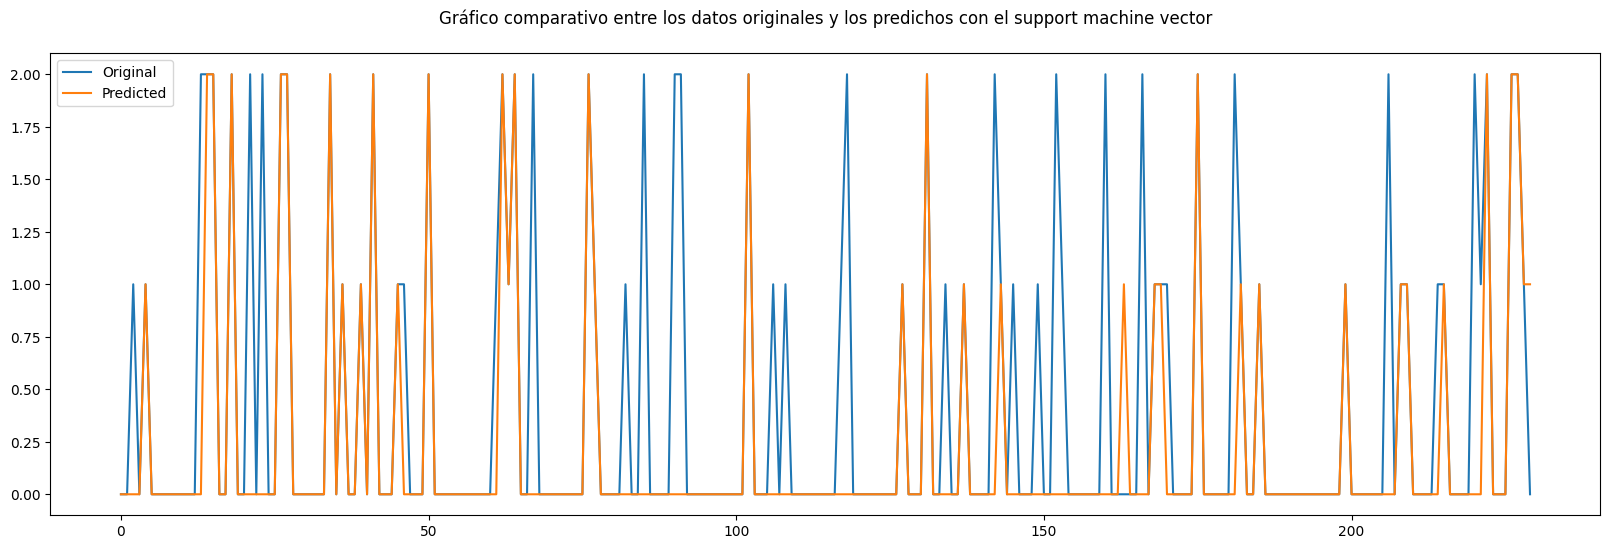

In [70]:
from matplotlib.figure import Figure
import matplotlib as mpl
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

predictions = y_predict

x_ax=range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax,predictions, label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el support machine vector\n")
plt.legend()

## Naive-Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [72]:
nby_predictions = nb.predict(X_test)
print(confusion_matrix(y_test,nby_predictions))  
print(classification_report(y_test,nby_predictions))  
print(accuracy_score(y_test, nby_predictions))

[[149  11   6]
 [ 12  19   1]
 [ 11   3  18]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       166
           1       0.58      0.59      0.58        32
           2       0.72      0.56      0.63        32

    accuracy                           0.81       230
   macro avg       0.72      0.68      0.70       230
weighted avg       0.81      0.81      0.81       230

0.808695652173913


# Code_before vs cwe_name

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 2359
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cve_id                        765 non-null    string 
 1   diff                          765 non-null    string 
 2   cwe_name                      765 non-null    string 
 3   diff_parsed                   765 non-null    string 
 4   cvss3_integrity_impact        765 non-null    string 
 5   cvss3_confidentiality_impact  765 non-null    string 
 6   cvss3_availability_impact     765 non-null    string 
 7   filename                      765 non-null    string 
 8   complexity                    765 non-null    float64
 9   severity                      765 non-null    int64  
 10  code_before                   765 non-null    string 
 11  code_after                    765 non-null    string 
 12  cwe_id                        765 non-null    string 
dtypes: f

In [74]:
print(df['code_before'][0])

define( [
	"jquery",
	"./helper",
	"ui/widgets/dialog",
	"ui/effects/effect-blind",
	"ui/effects/effect-explode"
], function( $, testHelper ) {

module( "dialog: options" );

test( "appendTo", function() {
	expect( 16 );
	var detached = $( "<div>" ),
		element = $( "#dialog1" ).dialog( {
			modal: true
		} );
	equal( element.dialog( "widget" ).parent()[ 0 ], document.body, "defaults to body" );
	equal( $( ".ui-widget-overlay" ).parent()[ 0 ], document.body, "overlay defaults to body" );
	element.dialog( "destroy" );

	element.dialog( {
		appendTo: ".wrap",
		modal: true
	} );
	equal( element.dialog( "widget" ).parent()[ 0 ], $( "#wrap1" )[ 0 ], "first found element" );
	equal( $( ".ui-widget-overlay" ).parent()[ 0 ], $( "#wrap1" )[ 0 ], "overlay first found element" );
	equal( $( "#wrap2 .ui-dialog" ).length, 0, "only appends to one element" );
	equal( $( "#wrap2 .ui-widget-overlay" ).length, 0, "overlay only appends to one element" );
	element.dialog( "destroy" );

	element.dialog( {


In [75]:
X_before= df.iloc[:, 10].values
results=[]

In [76]:
len(X_before[3])

14961

In [77]:
for info in range(0,len(X_before)):
    result= re.sub(r'\/\*[\s\S]*?\*\/|([^\\:]|^)\/\/.*$', ' ', str(X_before[info]))
    #result= re.sub(r'/\*(.|[\r\n])*?\*/', ' ', str(X_before[info]))
    result= re.sub(r'\W', ' ', result)
    #result= re.sub(r'(?:^| )\w(?:$| )','',result)
    #result = re.sub("\d+", "", result)
    result= re.sub(r'\s+', ' ', result, flags=re.I)
    results.append(result)

In [78]:
results[:30]

['define jquery helper ui widgets dialog ui effects effect blind ui effects effect explode function testHelper module dialog options test appendTo function expect 16 var detached div element dialog1 dialog modal true equal element dialog widget parent 0 document body defaults to body equal ui widget overlay parent 0 document body overlay defaults to body element dialog destroy element dialog appendTo wrap modal true equal element dialog widget parent 0 wrap1 0 first found element equal ui widget overlay parent 0 wrap1 0 overlay first found element equal wrap2 ui dialog length 0 only appends to one element equal wrap2 ui widget overlay length 0 overlay only appends to one element element dialog destroy element dialog appendTo null modal true equal element dialog widget parent 0 document body null equal ui widget overlay parent 0 document body overlay null element dialog destroy element dialog autoOpen false modal true dialog option appendTo wrap1 dialog open equal element dialog widget 

In [79]:
len(df['code_before'])

765

In [80]:
len(results)

765

In [81]:
df['code_before'][0]

'define( [\n\t"jquery",\n\t"./helper",\n\t"ui/widgets/dialog",\n\t"ui/effects/effect-blind",\n\t"ui/effects/effect-explode"\n], function( $, testHelper ) {\n\nmodule( "dialog: options" );\n\ntest( "appendTo", function() {\n\texpect( 16 );\n\tvar detached = $( "<div>" ),\n\t\telement = $( "#dialog1" ).dialog( {\n\t\t\tmodal: true\n\t\t} );\n\tequal( element.dialog( "widget" ).parent()[ 0 ], document.body, "defaults to body" );\n\tequal( $( ".ui-widget-overlay" ).parent()[ 0 ], document.body, "overlay defaults to body" );\n\telement.dialog( "destroy" );\n\n\telement.dialog( {\n\t\tappendTo: ".wrap",\n\t\tmodal: true\n\t} );\n\tequal( element.dialog( "widget" ).parent()[ 0 ], $( "#wrap1" )[ 0 ], "first found element" );\n\tequal( $( ".ui-widget-overlay" ).parent()[ 0 ], $( "#wrap1" )[ 0 ], "overlay first found element" );\n\tequal( $( "#wrap2 .ui-dialog" ).length, 0, "only appends to one element" );\n\tequal( $( "#wrap2 .ui-widget-overlay" ).length, 0, "overlay only appends to one element

In [82]:
tfidfconverter2 = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
x_code = tfidfconverter2.fit_transform(results).toarray()

In [83]:
x_code.shape

(765, 2000)

## RandomForest 3

In [84]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x_code, y_name, test_size=0.3, random_state=22, shuffle=True)

In [85]:
predictions = text_classifier.predict(X_test)

In [86]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

from sklearn.metrics import cohen_kappa_score

print("Kappa: ")
cohen_kappa_score(y_test,predictions)

[[154  12   0]
 [ 27   5   0]
 [ 31   1   0]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       166
           1       0.28      0.16      0.20        32
           2       0.00      0.00      0.00        32

    accuracy                           0.69       230
   macro avg       0.33      0.36      0.34       230
weighted avg       0.56      0.69      0.62       230

0.691304347826087
Kappa: 
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

0.04681298155498481

## SVC3

In [87]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 22)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
df_test= df

In [88]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(confusion_matrix(y_test,y_predict))  
print(classification_report(y_test,y_predict)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

from sklearn.metrics import cohen_kappa_score

print("Kappa: ")
cohen_kappa_score(y_test,y_predict)

[[165   1   0]
 [ 15  17   0]
 [  9   0  23]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       166
           1       0.94      0.53      0.68        32
           2       1.00      0.72      0.84        32

    accuracy                           0.89       230
   macro avg       0.94      0.75      0.82       230
weighted avg       0.90      0.89      0.88       230

Accuracy: 0.8913043478260869
Kappa: 


0.7155436825962205

In [89]:
X_train.shape

(535, 2000)

In [90]:
y_train.shape

(535,)

In [91]:
y_test.shape

(230,)

In [92]:
X_test.shape

(230, 2000)

In [93]:
from matplotlib.figure import Figure
import matplotlib as mpl
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
predictions = y_predict

x_ax=range(len(y_test))

<Figure size 2000x600 with 0 Axes>

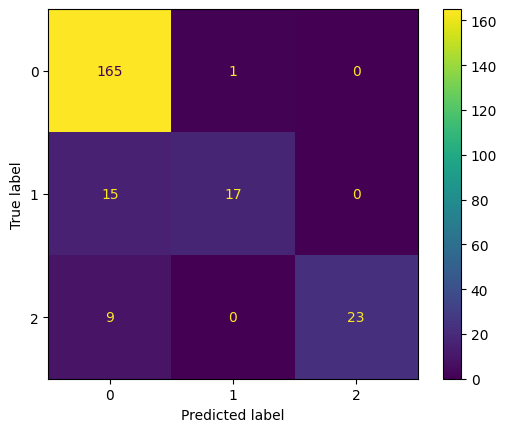

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels= classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

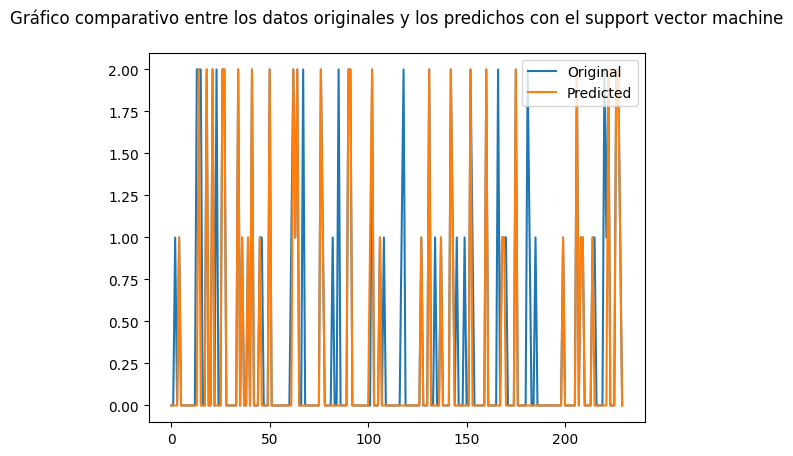

In [95]:
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax,predictions, label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el support vector machine\n")
plt.legend()

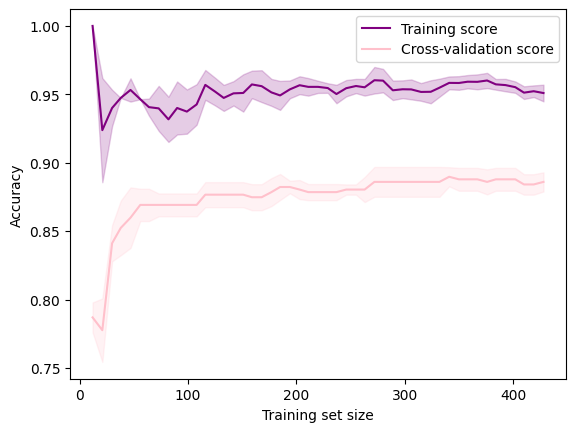

In [96]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score', color='purple')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='pink')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='purple', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='pink', alpha=0.2)
plt.legend(loc='best')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.show()

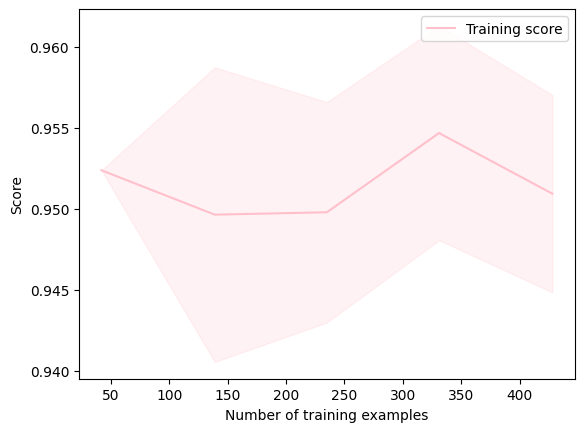

In [97]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, _ = learning_curve(classifier, X_train, y_train, cv=5)

# Calculate the mean and standard deviation for the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score', color='pink')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='pink')
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

In [98]:
X_train.shape

(535, 2000)

In [99]:
import joblib

joblib.dump(classifier, 'classifier.pkl')

['classifier.pkl']

## Naive-Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [101]:
nby_predictions = nb.predict(X_test)
print(confusion_matrix(y_test,nby_predictions))  
print(classification_report(y_test,nby_predictions))  
print(accuracy_score(y_test, nby_predictions))
from sklearn.metrics import cohen_kappa_score

print("Kappa: ")
cohen_kappa_score(y_test, nby_predictions)

[[165   1   0]
 [ 13  19   0]
 [ 19   0  13]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       166
           1       0.95      0.59      0.73        32
           2       1.00      0.41      0.58        32

    accuracy                           0.86       230
   macro avg       0.93      0.66      0.74       230
weighted avg       0.88      0.86      0.84       230

0.8565217391304348
Kappa: 


0.6034897084944102

## Deep Learning

In [102]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x_code, y_name, test_size=0.3, random_state=22, shuffle=True)

In [103]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [104]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense

2022-12-21 22:54:11.104764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 22:54:11.276214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 22:54:11.276254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 22:54:11.312744: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-21 22:54:13.559606: W tensorflow/stream_executor/pla

In [105]:
classifier = Sequential()

2022-12-21 22:54:16.632404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-21 22:54:16.632492: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 22:54:16.632554: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-0c2acef4-076b-4f92-b776-0f2055317568): /proc/driver/nvidia/version does not exist
2022-12-21 22:54:16.633109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [106]:
classifier.add(Dense(units = 6, input_shape=(None, 2000), kernel_initializer = 'uniform', 
activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', 
activation = 'sigmoid'))

In [107]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [108]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7421
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7607
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+0

## SDG

In [109]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", shuffle= True, random_state=22, penalty="l2")
clf.fit(X_train,y_train)
sdg_pred= clf.predict(X_test)

In [110]:
from sklearn.metrics import cohen_kappa_score
print(confusion_matrix(y_test,sdg_pred))
print(classification_report(y_test,sdg_pred))  
print(accuracy_score(y_test, sdg_pred))

print("Kappa: ")
cohen_kappa_score(y_test,sdg_pred)

[[160   4   2]
 [ 14  18   0]
 [ 11   0  21]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       166
           1       0.82      0.56      0.67        32
           2       0.91      0.66      0.76        32

    accuracy                           0.87       230
   macro avg       0.87      0.73      0.78       230
weighted avg       0.87      0.87      0.86       230

0.8652173913043478
Kappa: 


0.6563855421686748

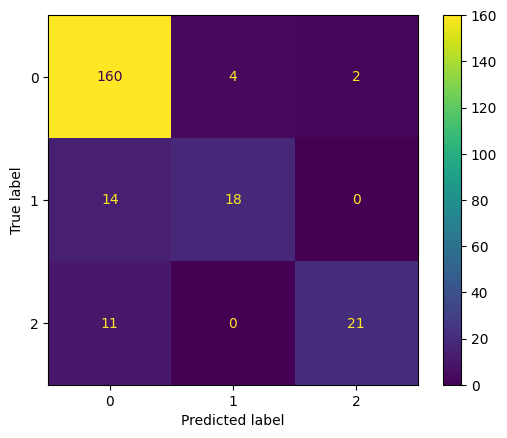

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, sdg_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

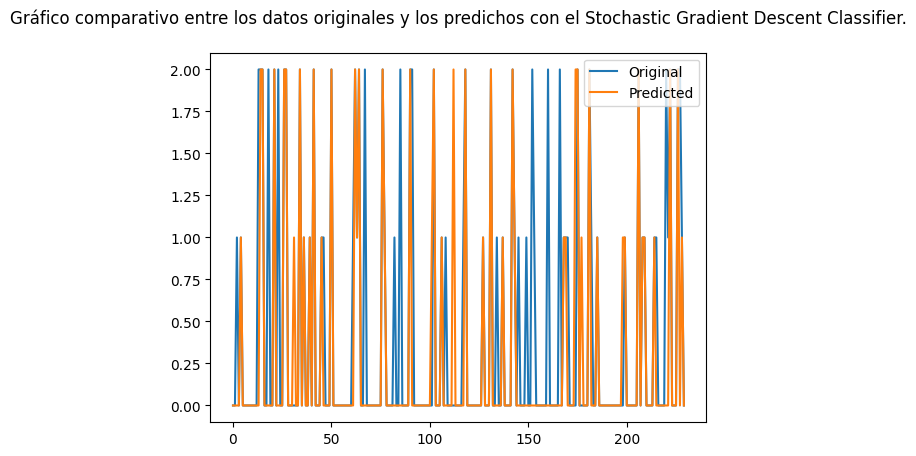

In [112]:
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax,sdg_pred, label= "Predicted")
plt.title("Gráfico comparativo entre los datos originales y los predichos con el Stochastic Gradient Descent Classifier.\n")
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c2acef4-076b-4f92-b776-0f2055317568' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>